# FETCHING MNIST DATA

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
random.set_seed(42)
np.random.seed(42)

In [4]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [5]:
print ('The shape of x_train is: ' + str(x_train.shape))
print ('The shape of x_test is: ' + str(x_test.shape))

The shape of x_train is: (60000, 28, 28)
The shape of x_test is: (10000, 28, 28)


# Flattening the image training data from a 2d array to 1d array

In [6]:
X_train = np.reshape(x_train, (x_train.shape[0], -1))
X_test = np.reshape(x_test, (x_test.shape[0], -1))

In [7]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of X_test is: ' + str(X_test.shape))

The shape of X_train is: (60000, 784)
The shape of X_test is: (10000, 784)


In [8]:
X_train=X_train[:4000,:]
y_train=y_train[:4000]

In [9]:
print ('The first element of X is: ', X_train[0])

The first element of X is:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 18

In [10]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))

The shape of X_train is: (4000, 784)
The shape of y_train is: (4000,)


# Plotting a random number

In [11]:
%matplotlib inline

In [12]:
import matplotlib
import matplotlib.pyplot as plt

In [13]:
any_digit=X_train[435]
any_digit_image= any_digit.reshape(28,28)

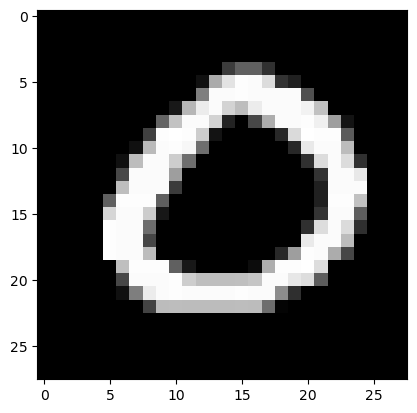

In [14]:
plt.imshow(any_digit_image, cmap='gray')

# Model representation

I will be using 4 to 5 neural networks and choose the one with maximum accuracy. 
Hidden layers will have ReLU activation and the output layer will have linear activation. Since we are doing multiclass classification, we will choose Softmax but doing so can cause rounding off errors as these errors are significant in Softmax. Numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training.

Since the images are of size 28x28, this gives us 784 inputs.

# Model 1

In [15]:
tf.random.set_seed(1234) # for consistent results
model1 = Sequential(
    [                
        tf.keras.Input(shape=(784,)),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear'), 
    ], name = "model1" 
)

In [16]:
model1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [17]:
[l1_m1, l2_m1, l3_m1]=model1.layers

The parameters have dimensions that are sized for a neural network with  25 units in layer 1, 15 units in layer 2 and  10 output units in layer 3, one for each digit.

In [18]:
W1,b1 = l1_m1.get_weights()
W2,b2 = l2_m1.get_weights()
W3,b3 = l3_m1.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


# Cross validation set

In [19]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, x_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
X_train.shape

(3200, 784)

We use the loss function, SparseCategoricalCrossentropy and include the softmax with the loss calculation by adding from_logits=True).

For optimizer, a popular choice is Adaptive Moment (Adam).

In [22]:
model1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history1 = model1.fit(
    X_train,y_train,
    epochs=100
)

Epoch 1/100
100/100 [==============================] - 2s 5ms/step - loss: 9.9376
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 2.1538
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 1.8522
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 1.6439
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 1.4867
Epoch 6/100
100/100 [==============================] - 0s 5ms/step - loss: 1.3911
Epoch 7/100
100/100 [==============================] - 0s 5ms/step - loss: 1.2928
Epoch 8/100
100/100 [==============================] - 0s 5ms/step - loss: 1.2342
Epoch 9/100
100/100 [==============================] - 0s 5ms/step - loss: 1.1594
Epoch 10/100
100/100 [==============================] - 0s 5ms/step - loss: 1.1154
Epoch 11/100
100/100 [==============================] - 0s 4ms/step - loss: 1.0648
Epoch 12/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9897
Epoch 13/100


Text(0.5, 1.0, 'Training History')

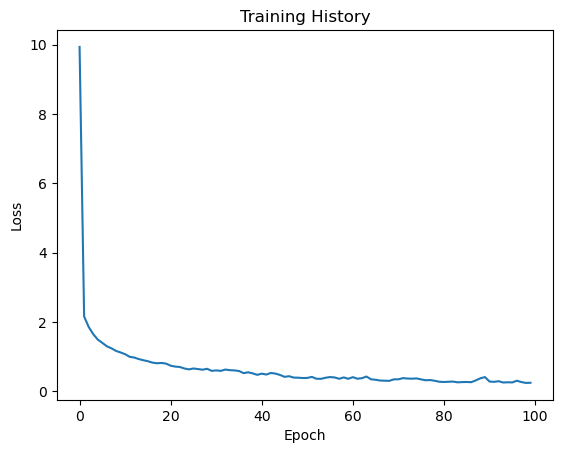

In [23]:
loss1=history1.history['loss']
plt.plot(loss1, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')

Ideally, the cost will decrease as the number of iterations of the algorithm increases. Tensorflow refers to the cost as loss. This is captured in the history variable above.

# Model 2

In [24]:
tf.random.set_seed(1234) # for consistent results
model2 = Sequential(
    [                
        tf.keras.Input(shape=(784,)),
        Dense(units=40, activation='relu'),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear'), 
    ], name = "model2" 
)

In [25]:
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                31400     
                                                                 
 dense_4 (Dense)             (None, 25)                1025      
                                                                 
 dense_5 (Dense)             (None, 15)                390       
                                                                 
 dense_6 (Dense)             (None, 10)                160       
                                                                 
Total params: 32,975
Trainable params: 32,975
Non-trainable params: 0
_________________________________________________________________


In [26]:
[l1_m2, l2_m2, l3_m2, l4_m2]=model2.layers

In [27]:
W1m2,b1m2 = l1_m2.get_weights()
W2m2,b2m2 = l2_m2.get_weights()
W3m2,b3m2 = l3_m2.get_weights()
W4m2,b4m2 = l4_m2.get_weights()
print(f"W1 shape = {W1m2.shape}, b1 shape = {b1m2.shape}")
print(f"W2 shape = {W2m2.shape}, b2 shape = {b2m2.shape}")
print(f"W3 shape = {W3m2.shape}, b3 shape = {b3m2.shape}")
print(f"W4 shape = {W4m2.shape}, b3 shape = {b4m2.shape}")

W1 shape = (784, 40), b1 shape = (40,)
W2 shape = (40, 25), b2 shape = (25,)
W3 shape = (25, 15), b3 shape = (15,)
W4 shape = (15, 10), b3 shape = (10,)


In [28]:
model2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history2 = model2.fit(
    X_train,y_train,
    epochs=100
)

Epoch 1/100
100/100 [==============================] - 2s 5ms/step - loss: 5.9687
Epoch 2/100
100/100 [==============================] - 0s 5ms/step - loss: 1.8505
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 1.6372
Epoch 4/100
100/100 [==============================] - 0s 5ms/step - loss: 1.4742
Epoch 5/100
100/100 [==============================] - 0s 5ms/step - loss: 1.3282
Epoch 6/100
100/100 [==============================] - 1s 5ms/step - loss: 1.2487
Epoch 7/100
100/100 [==============================] - 1s 5ms/step - loss: 1.1533
Epoch 8/100
100/100 [==============================] - 0s 5ms/step - loss: 1.1177
Epoch 9/100
100/100 [==============================] - 0s 5ms/step - loss: 1.0468
Epoch 10/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9816
Epoch 11/100
100/100 [==============================] - 0s 5ms/step - loss: 0.9311
Epoch 12/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9011
Epoch 13/100


Text(0.5, 1.0, 'Training History')

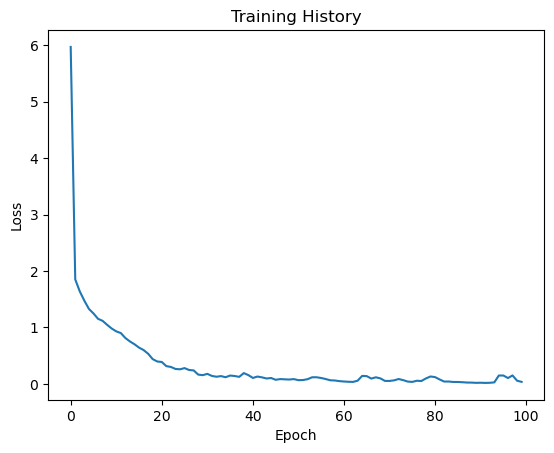

In [29]:
loss2=history2.history['loss']
plt.plot(loss2, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')

# Model 3

In [30]:
tf.random.set_seed(1234) # for consistent results
model3 = Sequential(
    [                
        tf.keras.Input(shape=(784,)),
        Dense(units=30, activation='relu'),
        Dense(units=25, activation='relu'),
        Dense(units=40, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear'), 
    ], name = "model3" 
)

In [31]:
model3.summary()

Model: "model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                23550     
                                                                 
 dense_8 (Dense)             (None, 25)                775       
                                                                 
 dense_9 (Dense)             (None, 40)                1040      
                                                                 
 dense_10 (Dense)            (None, 15)                615       
                                                                 
 dense_11 (Dense)            (None, 10)                160       
                                                                 
Total params: 26,140
Trainable params: 26,140
Non-trainable params: 0
_________________________________________________________________


In [32]:
[l1_m3, l2_m3, l3_m3, l4_m3, l5_m3]=model3.layers

In [33]:
W1m3,b1m3 = l1_m3.get_weights()
W2m3,b2m3 = l2_m3.get_weights()
W3m3,b3m3 = l3_m3.get_weights()
W4m3,b4m3 = l4_m3.get_weights()
W5m3,b5m3 = l5_m3.get_weights()
print(f"W1 shape = {W1m3.shape}, b1 shape = {b1m3.shape}")
print(f"W2 shape = {W2m3.shape}, b2 shape = {b2m3.shape}")
print(f"W3 shape = {W3m3.shape}, b3 shape = {b3m3.shape}")
print(f"W4 shape = {W4m3.shape}, b3 shape = {b4m3.shape}")
print(f"W5 shape = {W5m3.shape}, b3 shape = {b5m3.shape}")

W1 shape = (784, 30), b1 shape = (30,)
W2 shape = (30, 25), b2 shape = (25,)
W3 shape = (25, 40), b3 shape = (40,)
W4 shape = (40, 15), b3 shape = (15,)
W5 shape = (15, 10), b3 shape = (10,)


In [34]:
model3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history3 = model3.fit(
    X_train,y_train,
    epochs=100
)

Epoch 1/100
100/100 [==============================] - 3s 5ms/step - loss: 4.3450
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 1.6807
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 1.3427
Epoch 4/100
100/100 [==============================] - 1s 5ms/step - loss: 0.9777
Epoch 5/100
100/100 [==============================] - 1s 5ms/step - loss: 0.7352
Epoch 6/100
100/100 [==============================] - 1s 5ms/step - loss: 0.6436
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.5326
Epoch 8/100
100/100 [==============================] - 0s 5ms/step - loss: 0.4935
Epoch 9/100
100/100 [==============================] - 0s 5ms/step - loss: 0.3891
Epoch 10/100
100/100 [==============================] - 1s 5ms/step - loss: 0.3401
Epoch 11/100
100/100 [==============================] - 1s 5ms/step - loss: 0.3096
Epoch 12/100
100/100 [==============================] - 0s 5ms/step - loss: 0.2963
Epoch 13/100


Text(0.5, 1.0, 'Training History')

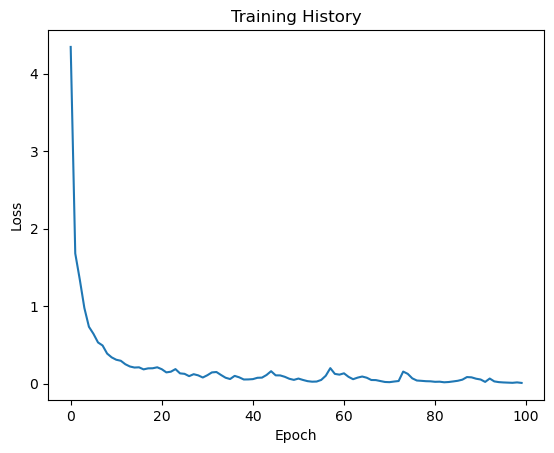

In [35]:
loss3=history3.history['loss']
plt.plot(loss3, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')

In [36]:
prediction = model3.predict(X_train[43].reshape(1,784))
prediction_p = tf.nn.softmax(prediction)
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

1/1 [==============================] - 0s 308ms/step
np.argmax(prediction_p): 5


In [37]:
digi_img=X_train[43].reshape(28,28)

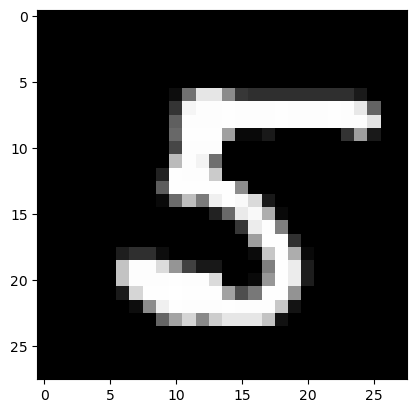

In [38]:
plt.imshow(digi_img, cmap='gray')

# Model1 Accuracy

In [39]:
x_cv.shape

(800, 784)

In [82]:
x_cv1, x_cv2, y_cv1, y_cv2 = train_test_split(x_cv, y_cv, test_size=0.3, random_state=42)

In [41]:
x_cv2.shape

(240, 784)

In [42]:
m, n= x_cv2.shape
f1=[]
for i in range(m):
    prediction = model1.predict(x_cv2[i].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    f1.append(yhat)

1/1 [==============================] - 0s 63ms/step


# Error Calculation model 1

In [43]:
error1=0
J_cv=0
J=0
for d in range(len(f1)):
    if (f1[d]!=y_cv2[d]):
        error1+=1

In [68]:
print("Total misprediction by model1 from total 240 inputs:", error1)

Total misprediction by model1 from total 240 inputs: 34


In [45]:
accuracy1 = accuracy_score(f1, y_cv2)
print(f"Accuracy of model 2: {accuracy1}")

Accuracy of model 2: 0.8583333333333333


# Model2 Accuracy

In [83]:
m, n= x_cv2.shape
f2=[]
for i in range(m):
    prediction = model2.predict(x_cv2[i].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    f2.append(yhat)

1/1 [==============================] - 0s 54ms/step


# Error Calculation model 2

In [77]:
error2=0
for d in range(len(f2)):
    if (f2[d]!=y_cv2[d]):
        error2+=1

In [69]:
print("Total misprediction by model2 from total 240 inputs:", error2)


Total misprediction by model2 from total 240 inputs: 12


In [70]:
accuracy2 = accuracy_score(f2, y_cv2)
print(f"Accuracy of model 2: {accuracy2}")

Accuracy of model 2: 0.953125


In [75]:
len(f2)

960

# Model3 Accuracy

In [76]:
m, n= x_cv2.shape
f3=[]
for i in range(m):
    prediction = model3.predict(x_cv2[i].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    f3.append(yhat)

1/1 [==============================] - 0s 52ms/step


# Error Calculation model 3

In [78]:
error3=0
for d in range(len(f3)):
    if (f3[d]!=y_cv2[d]):
        error3+=1

In [79]:
print("Total misprediction by model3 from total 240 inputs:", error3)

Total misprediction by model3 from total 240 inputs: 93


In [80]:
accuracy3 = accuracy_score(f3, y_cv2)
print(f"Accuracy of model 3: {accuracy3}")

Accuracy of model 3: 0.903125


In [74]:
len(f3)

240

<b>Model 2 performs the best among the 3 models as it gives minimum number of errors, 12 and accuracy of 95.31%.</b>

# Model 2 Final 

1/1 [==============================] - 0s 47ms/step


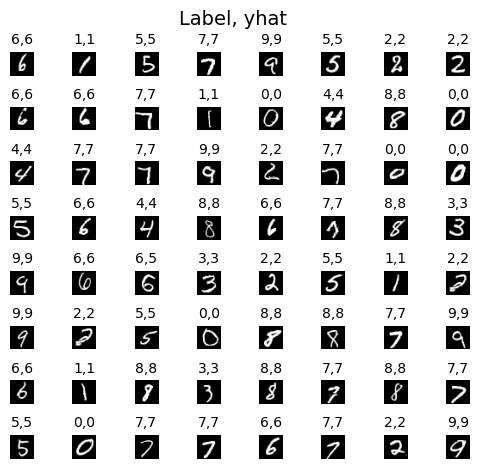

In [54]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X_train.shape
fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model2.predict(X_train[random_index].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y_train[random_index]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

# Performing Data Augmentation

In [55]:
from scipy.ndimage import shift

In [56]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


# Creating Augmented Dataset
X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
     for image, label in zip(X_train, y_train):
             X_train_augmented.append(shift_image(image, dx, dy))
             y_train_augmented.append(label)


# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]


In [57]:
X_train2, x_cv, y_train2, y_cv = train_test_split(X_train_augmented, y_train_augmented, test_size=0.2, random_state=42)
x_cv1, x_cv2, y_cv1, y_cv2 = train_test_split(x_cv, y_cv, test_size=0.3, random_state=42)

In [58]:
X_train2.shape

(12800, 784)

In [59]:
model2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history2 = model2.fit(
    X_train2,y_train2,
    epochs=100
)

Epoch 1/100
400/400 [==============================] - 4s 5ms/step - loss: 0.5690
Epoch 2/100
400/400 [==============================] - 2s 5ms/step - loss: 0.3360
Epoch 3/100
400/400 [==============================] - 2s 5ms/step - loss: 0.2462
Epoch 4/100
400/400 [==============================] - 2s 5ms/step - loss: 0.2047
Epoch 5/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1743
Epoch 6/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1568
Epoch 7/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1409
Epoch 8/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1390
Epoch 9/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1371
Epoch 10/100
400/400 [==============================] - 2s 5ms/step - loss: 0.1032
Epoch 11/100
400/400 [==============================] - 2s 5ms/step - loss: 0.0980
Epoch 12/100
400/400 [==============================] - 2s 4ms/step - loss: 0.1074
Epoch 13/100


In [60]:
m, n= x_cv2.shape
f2=[]
for i in range(m):
    prediction = model2.predict(x_cv2[i].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    f2.append(yhat)
error2=0
for d in range(len(f1)):
    if (f2[d]!=y_cv2[d]):
        error2+=1

1/1 [==============================] - 0s 63ms/step


In [66]:
print("Total misprediction by model2 from total 800 inputs:", error2)
accuracy2 = accuracy_score(f2, y_cv2)
print(f"Accuracy of model 2: {accuracy2}")

Total misprediction by model2 from total 800 inputs: 12
Accuracy of model 2: 0.953125


In [62]:
x_cv2.shape

(960, 784)

<b>We observe that the accuracy of the model 2 increases by doing Data Augmentation to 95.31%</b>

# Random Forest Algorithm


In [64]:
from sklearn.ensemble import RandomForestClassifier
mnist_rfa = RandomForestClassifier(random_state=42)
mnist_rfa.fit(X_train2, y_train2)

# Evaluating the model
y_pred = mnist_rfa.predict(x_cv2)
score = accuracy_score(y_cv2, y_pred)
print("Accuracy score after training on augmented dataset", score)

Accuracy score after training on augmented dataset 0.9552083333333333


In [65]:
X_train.shape

(3200, 784)

<b>We have increased the accuracy even more, to 95.52% </b>